## Pantas: join de DataFrames

In [1]:
import pandas as pd
import mysql.connector as connector

In [2]:
connection = connector.connect(
    host="localhost",
    port="3306",
    user="root",
    password="admin",
    database="world"
)

In [3]:
try:
    df_city = pd.read_sql("SELECT * FROM city;", connection)
    df_country = pd.read_sql("SELECT * FROM country;", connection)
    df_lang = pd.read_sql("SELECT * FROM countrylanguage;", connection)
except Exception as e:
    print(str(e))
finally:
    connection.close()

C:\Users\alanj\AppData\Local\Temp\ipykernel_15028\2445904817.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_city = pd.read_sql("SELECT * FROM city;", connection)
C:\Users\alanj\AppData\Local\Temp\ipykernel_15028\2445904817.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_country = pd.read_sql("SELECT * FROM country;", connection)
C:\Users\alanj\AppData\Local\Temp\ipykernel_15028\2445904817.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_lang = pd.read_sql("SELECT * FROM countrylanguage;", connection)


In [4]:
df_city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [5]:
df_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [6]:
df_lang.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


## Mostrar las 10 ciudades con mayor población:

df_city

In [7]:
df_city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [8]:
# df_city.sort_values('Population') # ascendente
df_city.sort_values('Population', ascending=False).head(10) # descendente
# df_city.sort_values('Population', ascending=False, inplace=True)

,ID,Name,CountryCode,District,Population
1023,1024,Mumbai (Bombay),IND,Maharashtra,10500000
2330,2331,Seoul,KOR,Seoul,9981619
205,206,São Paulo,BRA,São Paulo,9968485
1889,1890,Shanghai,CHN,Shanghai,9696300
938,939,Jakarta,IDN,Jakarta Raya,9604900
2821,2822,Karachi,PAK,Sindh,9269265
3356,3357,Istanbul,TUR,Istanbul,8787958
2514,2515,Ciudad de México,MEX,Distrito Federal,8591309
3579,3580,Moscow,RUS,Moscow (City),8389200
3792,3793,New York,USA,New York,8008278


In [9]:
df_city.sort_values('Population', ascending=False).iloc[:10]


,ID,Name,CountryCode,District,Population
1023,1024,Mumbai (Bombay),IND,Maharashtra,10500000
2330,2331,Seoul,KOR,Seoul,9981619
205,206,São Paulo,BRA,São Paulo,9968485
1889,1890,Shanghai,CHN,Shanghai,9696300
938,939,Jakarta,IDN,Jakarta Raya,9604900
2821,2822,Karachi,PAK,Sindh,9269265
3356,3357,Istanbul,TUR,Istanbul,8787958
2514,2515,Ciudad de México,MEX,Distrito Federal,8591309
3579,3580,Moscow,RUS,Moscow (City),8389200
3792,3793,New York,USA,New York,8008278


<Axes: xlabel='District'>

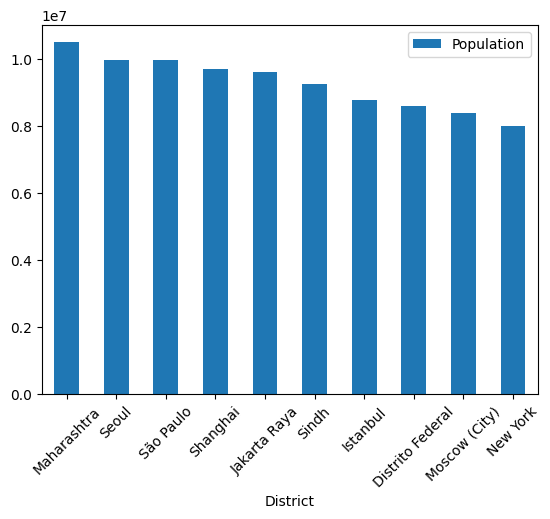

In [10]:
df_city_top_10 = df_city.sort_values('Population', ascending=False).iloc[:10]

df_city_top_10.plot(kind='bar', x='District', y='Population', rot=45)


<Axes: xlabel='Name'>

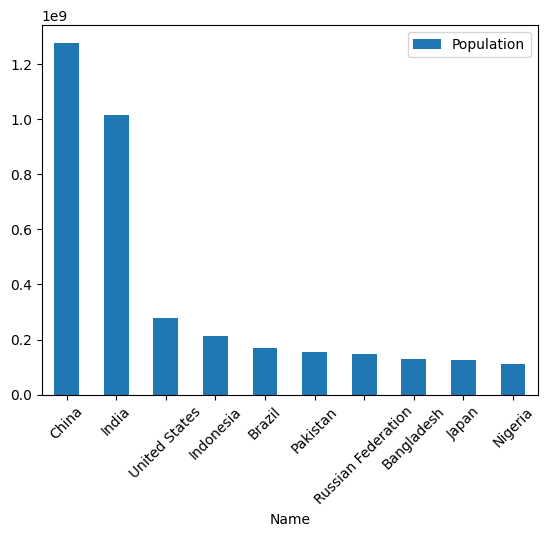

In [11]:
df_country_top_10 = df_country.sort_values('Population', ascending=False).iloc[:10]

df_country_top_10.plot(kind='bar', x='Name', y='Population', rot=45)

## Mostrar la población total por continente:

df_country agrupar Population por Continent

In [12]:
population_by_continent = df_country.groupby('Continent')['Population'].sum()
df_population_by_continent = pd.DataFrame(population_by_continent)
df_population_by_continent.reset_index(inplace=True) # resetear índice para sacar Continent del índice
df_population_by_continent.sort_values('Population', ascending=False)

,Continent,Population
2,Asia,3705025700
0,Africa,784475000
3,Europe,730074600
4,North America,482993000
6,South America,345780000
5,Oceania,30401150
1,Antarctica,0


In [13]:
area_by_continent = df_country.groupby('Continent')['SurfaceArea'].sum()
df_area_by_continent = pd.DataFrame(area_by_continent)
df_area_by_continent.reset_index(inplace=True) # resetear índice para sacar Continent del índice
df_area_by_continent.sort_values('SurfaceArea', ascending=False, inplace=True)
df_area_by_continent

,Continent,SurfaceArea
2,Asia,31881005.0
0,Africa,30250377.0
4,North America,24214470.0
3,Europe,23049133.9
6,South America,17864926.0
1,Antarctica,13132101.0
5,Oceania,8564294.0


<Axes: xlabel='Continent'>

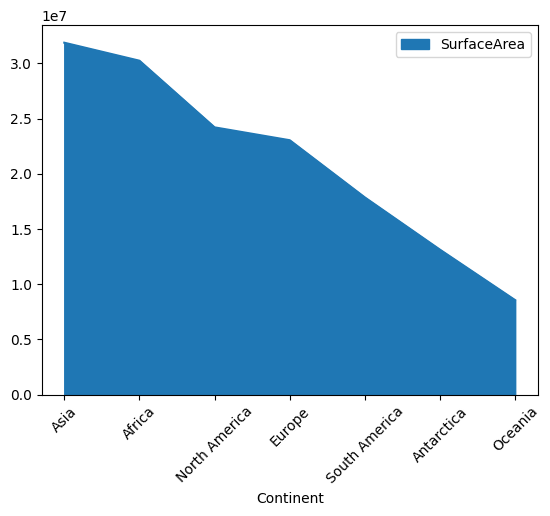

In [14]:
df_area_by_continent.plot(kind='area', x='Continent', y='SurfaceArea', rot=45)

## Fusionar DataFrames

In [15]:
df_city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [16]:
df_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [17]:
df_city_country = pd.merge(df_city, df_country, left_on="CountryCode", right_on="Code")
df_city_country.head(2)

,ID,Name_x,CountryCode,District,Population_x,Code,Name_y,Continent,Region,SurfaceArea,IndepYear,Population_y,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,2,Qandahar,AFG,Qandahar,237500,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF


In [18]:
# imprimir dimensiones de los dataframes
print(df_city.shape)
print(df_country.shape)
print(df_city_country.shape)

(4079, 5)
(239, 15)
(4079, 20)


In [19]:
# renombrar las columnas
df_city_country.rename(columns={
    'Name_x': 'city_name',
    'Population_x': 'city_population',
    'Name_y': 'country_name',
    'Population_y': 'country_population'
})
df_city_country.head(2)

,ID,Name_x,CountryCode,District,Population_x,Code,Name_y,Continent,Region,SurfaceArea,IndepYear,Population_y,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,2,Qandahar,AFG,Qandahar,237500,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF


In [20]:
df_city_country = pd.merge(
    df_city.add_prefix('city_'), 
    df_country.add_prefix('country_'), 
    left_on="city_CountryCode", 
    right_on="country_Code"
)
df_city_country.head(2)


,city_ID,city_Name,city_CountryCode,city_District,city_Population,country_Code,country_Name,country_Continent,country_Region,country_SurfaceArea,country_IndepYear,country_Population,country_LifeExpectancy,country_GNP,country_GNPOld,country_LocalName,country_GovernmentForm,country_HeadOfState,country_Capital,country_Code2
0,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,2,Qandahar,AFG,Qandahar,237500,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF


In [21]:
df_city_country.columns

Index(['city_ID', 'city_Name', 'city_CountryCode', 'city_District',
       'city_Population', 'country_Code', 'country_Name', 'country_Continent',
       'country_Region', 'country_SurfaceArea', 'country_IndepYear',
       'country_Population', 'country_LifeExpectancy', 'country_GNP',
       'country_GNPOld', 'country_LocalName', 'country_GovernmentForm',
       'country_HeadOfState', 'country_Capital', 'country_Code2'],
      dtype='object')

In [22]:
df_city_country.isnull().sum()

city_ID                     0
city_Name                   0
city_CountryCode            0
city_District               0
city_Population             0
country_Code                0
country_Name                0
country_Continent           0
country_Region              0
country_SurfaceArea         0
country_IndepYear          61
country_Population          0
country_LifeExpectancy     11
country_GNP                 0
country_GNPOld            134
country_LocalName           0
country_GovernmentForm      0
country_HeadOfState         2
country_Capital             0
country_Code2               0
dtype: int64

In [23]:
df_city_country.drop(['city_ID', 'city_CountryCode'], axis=1, inplace=True)

In [24]:
df_city_country.head(1)

,city_Name,city_District,city_Population,country_Code,country_Name,country_Continent,country_Region,country_SurfaceArea,country_IndepYear,country_Population,country_LifeExpectancy,country_GNP,country_GNPOld,country_LocalName,country_GovernmentForm,country_HeadOfState,country_Capital,country_Code2
0,Kabul,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF


In [25]:
# count de ciudades por país
count_city = df_city_country.groupby('country_Name')['city_Name'].count()
df_count_city = pd.DataFrame(count_city).reset_index()
df_count_city.rename(columns={'city_Name':'city_count'}, inplace=True)
df_count_city.sort_values('city_count', ascending=False).head(10)

,country_Name,city_count
40,China,363
94,India,341
218,United States,274
27,Brazil,250
102,Japan,248
170,Russian Federation,189
131,Mexico,173
163,Philippines,136
76,Germany,93
95,Indonesia,85


## Idioma

In [26]:
df_lang.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


In [30]:
filter = df_country['Name'] == 'Spain'
df_country[filter]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
66,ESP,Spain,Europe,Southern Europe,505992.0,1492.0,39441700,78.8,553233.0,532031.0,España,Constitutional Monarchy,Juan Carlos I,653.0,ES


In [32]:
filter = df_lang['CountryCode'] == 'ESP'
df_lang_spain = df_lang[filter]
df_lang_spain

,CountryCode,Language,IsOfficial,Percentage
265,ESP,Basque,F,1.6
266,ESP,Catalan,F,16.9
267,ESP,Galecian,F,6.4
268,ESP,Spanish,T,74.4


<Axes: ylabel='Percentage'>

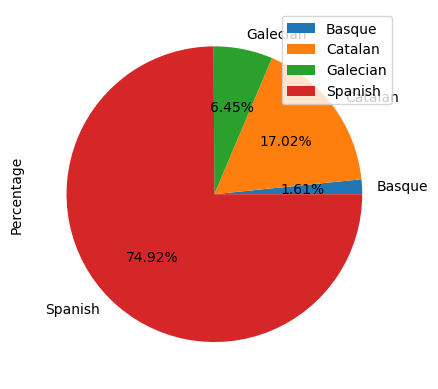

In [37]:
df_lang_spain.plot(kind='pie', y='Percentage', 
                    labels=df_lang_spain['Language'], 
                    autopct='%1.2f%%')